# RNN

In [ ]:
from IPython import display
display.Image("/home/tuantran/Documents/OPT/Multi_Gradient_Descent/RNNs_method/10.jpg")



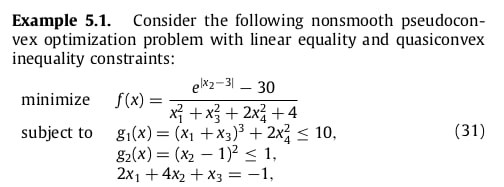

In [58]:
display.Image("/home/tuantran/Documents/OPT/Multi_Gradient_Descent/RNNs_method/11.jpg")

In [31]:
import numpy as np
from autograd import grad
import autograd.numpy as np1
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import random
import time
from scipy.optimize import BFGS,SR1
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint

[[0.39990791]
 [0.74994593]
 [0.44161731]
 [0.58240044]]
[[-0.60009209]
 [ 0.22309778]
 [-0.05838269]
 [ 0.58240044]]
-2.7630131656834904
[[0.14105432]
 [0.70056061]
 [0.37999444]
 [0.75230403]]
[[-0.72561235]
 [ 0.01648375]
 [-0.05333889]
 [ 0.75230403]]
-1.8092785302537575
[[0.14115184]
 [0.88888235]
 [0.29315532]
 [0.4265406 ]]
[[-0.59218149]
 [ 0.21903843]
 [-0.07351135]
 [ 0.4265406 ]]
-2.9376270222047207


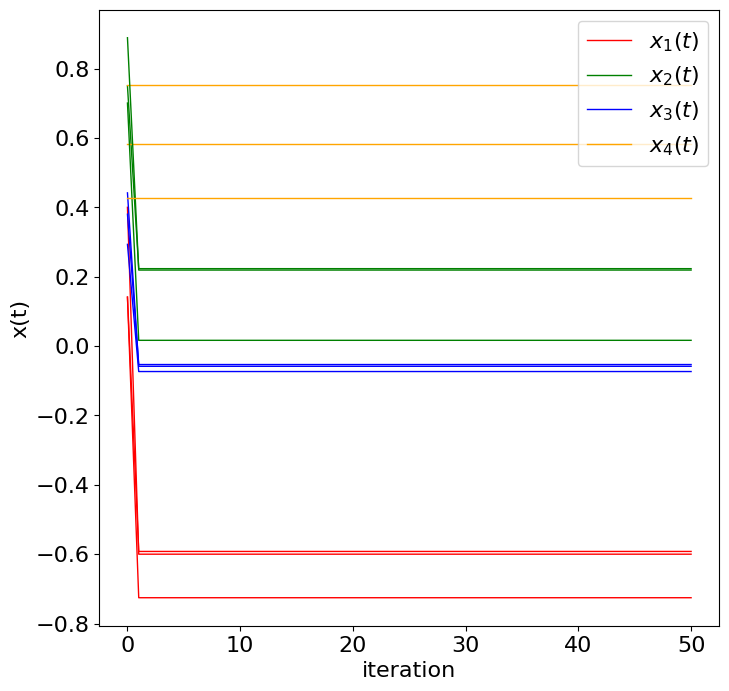

In [55]:
# RK4 method
def ode_solve_G(z0, G):
    """
    Simplest RK4 ODE initial value solver
    """
    n_steps = 500
    z = z0
    h = np.array([0.05])
    for i_step in range(n_steps):
        k1 = h*G(z)
        k2 = h * (G((z+h/2)))
        k3 = h * (G((z+h/2)))
        k4 = h * (G((z+h)))
        k = (1/6)*(k1+2*k2+2*k3+k4)
        z = z + k
    return z
# Objective function
def f(x):
    return (np1.exp(np1.abs(x[1][0]-3)) - 30) / (x[0][0]**2 + x[2][0]**2 + 2*(x[3][0]**2) + 4)
# Constraint functions
def g1(x):
    
    return ((x[0][0] + x[2][0])**3 + 2*(x[3][0])**2) - 10
def g2(x):
    return ((x[1][0] - 1)**2) - 1
A = np.array([[2,4,1,0]])
b = np.array([[-1]])
# def g3(x):
#     x = np.array(x)
#     return (A@(x.T) - b.T).tolist()[0][0] # 
    
g1_dx = grad(g1)
g2_dx = grad(g2)
#g3_dx = grad(g3)
g_dx = [g1_dx,g2_dx]
f_dx = grad(f)
def Phi(s):
    if s > 0:
        return 1
    elif s == 0:
        return np.random.rand(1)
    return 0
# Neural network
def G(x):
    g1x = g1(x)
    g2x = g2(x)
    #g3x = g3(x)
    gx = [g1x,g2x]
    c_xt = 1.
    Px = np.zeros((4, 1))

    for (i,j) in zip(gx, g_dx):
        c_xt *= (1-Phi(i))
        #print(Phi(i),j(x))
        Px += Phi(i)*j(x)
    c_xt *= (1-Phi(np.abs(A@(x) - b)))
    
    eq_constr_dx = ((2*Phi(A@(x)-b)-1)*A.T)
    #print(eq_constr_dx.shape)
    #print(((2*Phi(A@(x)-b)-1)*A.T).shape)
    return (-c_xt*f_dx(x) - Px - eq_constr_dx) 
def run_nonsmooth(x0, max_iters):
    xt = x0
    res = []
    res.append(xt.tolist())
    for t in range(max_iters):
        xt = ode_solve_G(xt,G)
        #print(xt.shape)
        res.append(xt.tolist())
    print(xt)
    print(f(xt))
    return res
def plot_x(sol_all,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    for i in range(count):
        plt.plot(t, sol_all[i][:,0],color='red',label=r'$x_{1}(t)$',linewidth=1)
        plt.plot(t, sol_all[i][:,1],color='green',label=r'$x_{2}(t)$',linewidth=1)
        plt.plot(t, sol_all[i][:,2],color='blue',label=r'$x_{3}(t)$',linewidth=1)
        plt.plot(t, sol_all[i][:,3],color='orange',label=r'$x_{4}(t)$',linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('x(t)')
    plt.legend([r'$x_{1}(t)$',r'$x_{2}(t)$',r'$x_{3}(t)$',r'$x_{4}(t)$']) #,r'$x_{4}(t)$',r'$x_{5}(t)$',r'$x_{6}(t)$',r'$x_{7}(t)$',r'$x_{8}(t)$',r'$x_{9}(t)$',r'$x_{10}(t)$'])
    plt.show()
def plot_y(val_all,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    for i in range(count):
        plt.plot(t, val_all[i][:],color='r',label=r'$f_(x)$',linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('f(x)')
    plt.legend([r'$f(x)$'])
    
    plt.show()
def plot_compare(val_all,val_all1,count,max_iters):
    t = [i for i in range(max_iters+1)]
    plt.figure(figsize=(8,8))
    plt.rcParams.update({'font.size': 16})
    for i in range(count):
        plt.plot(t, val_all[i][:],color='r',label=r'$f1_(x)$',linewidth=1)
        plt.plot(t, val_all1[i][:],color='g',label=r'$f2_(x)$',linewidth=1)
    plt.xlabel('iteration')
    plt.ylabel('|f(x)-f(x*)|')
    plt.legend([r'$f1_(x)$',r'$f2_(x)$'])
    
    plt.show()
# cons = ({'type': 'eq',
#           'fun' : lambda x: np.array([g3(x)]),
#           'jac' : lambda x: np.array([2,4,1,0])},
#         {'type': 'ineq',
#           'fun' : lambda x: np.array([-g1(x)]),
#           'jac' : lambda x: np.array([-g1_dx(x)])},
#          {'type': 'ineq',
#           'fun' : lambda x: np.array([-g2(x)]),
#           'jac' : lambda x: np.array([-g2_dx(x)])})
# def rosen(x,y):
#     """The Rosenbrock function"""
#     return np.sqrt(np.sum((x-y)**2))
# def find_min(y,n):
#     x = np.random.rand(1,n).tolist()[0]
#     res = minimize(rosen, x, args=(y), jac="2-point",hess=BFGS(),
#                 constraints=cons,method='trust-constr', options={'disp': False})
#     return res.x

# def find_exact(x_init,n):
#     x_init = find_min(x_init,n).tolist()
#     x = find_min1(x_init)
#     return x
# def rosen1(x):
#     """The Rosenbrock function"""
#     #return np.sqrt(np.sum((x-y)**2))
#     return (np1.exp(np1.abs(x[1]-3)) - 30) / (x[0]**2 + x[2]**2 + 2*(x[3]**2) + 4)

# def find_min1(x_init):
    
#     #print(x)
#     # res = minimize(rosen, x, args=(y), jac="2-point",
#     #             constraints=cons,method='SLSQP', options={'disp': False},bounds=bounds)
#     res = minimize(rosen1, x_init, jac="2-point",hess=BFGS(),
#                 constraints=cons,method='trust-constr', options={'disp': True})
#     return res.x

if __name__ == '__main__':
    num = 3 # number of init points
    max_iters = 50 # number of interations
    max_iters1 = 50
    sol_all,sol_all1 = [],[]
    val_all,val_all1 = [],[]
    count = 0
    epsilon = 0.1
    mu0 = np.random.rand(1) # init mu0 
    epsi0 = np.random.rand(1) # init epsi0
    alpha = np.random.rand(1) # init alpha
    n = 4 # dimension x
    # x_init = np.random.rand(1,n)
    # x_exact = find_exact(x_init,n)

    # g1x = g1(x_exact)
    # g2x = g2(x_exact)
    # g3x = g3(x_exact)
    # print(x_exact)
    # print(f(x_exact),g1x,g2x,g3x)
    for i in range(num):
        x0 = np.random.rand(n,1)
        print(x0)
        res = run_nonsmooth(x0, max_iters)
        tmp = np.array(res)[:,:]
        sol_all.append(tmp)
        count += 1
    # Plot trajectory
    plot_x(sol_all,count,max_iters)



# GDA

GDA:  2.4678828716278076
GDA:  2.2977352142333984
GDA:  2.1965866088867188


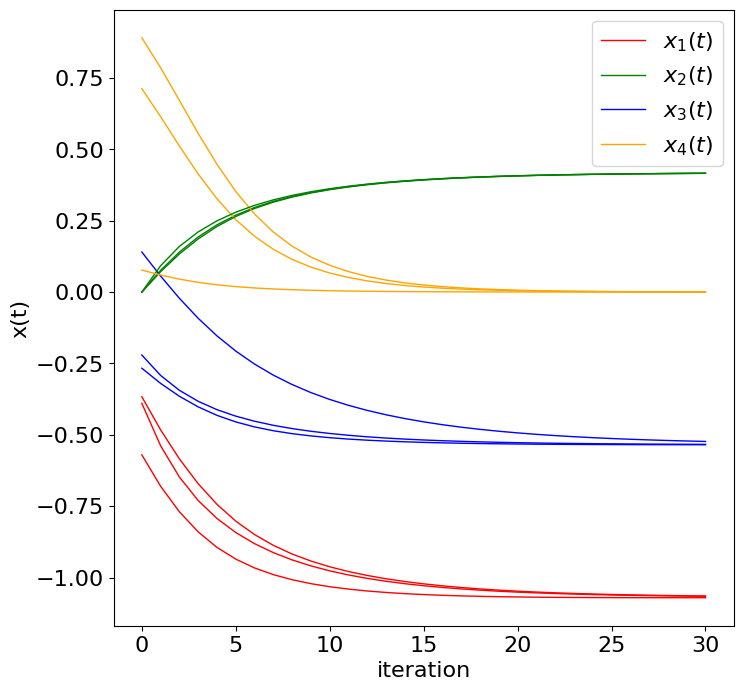

In [62]:
# RK4 method
def ode_solve_G(z0, G,epsi_t,mut,n):
    """
    Simplest RK4 ODE initial value solver
    """
    n_steps = 500
    z = z0
    h = np.array([0.01])
    for i_step in range(n_steps):
        k1 = h*G(z,epsi_t,mut,n)
        k2 = h * (G((z+h/2),epsi_t,mut,n))
        k3 = h * (G((z+h/2),epsi_t,mut,n))
        k4 = h * (G((z+h),epsi_t,mut,n))
        k = (1/6)*(k1+2*k2+2*k3+k4)
        z = z + k
    return z
def theta(x,mu):
    if np1.abs(x) >= (mu/2):
        return np1.abs(x)
    else:
        return x**2/mu + mu/4 
def f_mu(x,mu):
    return (np1.exp(theta(x[1]-3,mu)) - 30) / (x[0]**2 + x[2]**2 + 2*(x[3]**2) + 4)
def f(x):
    return (np1.exp(np1.abs(x[1]-3)) - 30) / (x[0]**2 + x[2]**2 + 2*(x[3]**2) + 4)
def g1(x):
    return ((x[0] + x[2])**3 + 2*(x[3])**2) - 10
def g2(x):
    return ((x[1] - 1)**2) - 1
def g3(x):
    x = np.array(x)
    A = np.array([[2,4,1,0]])
    b = np.array([[-1]])
    return (A@(x.T) - b.T).tolist()[0][0] # 
g1_dx = grad(g1)
g2_dx = grad(g2)
g3_dx = grad(g3)
g_dx = [g1_dx,g2_dx]
f_dx = grad(f)
f_dx_mu = grad(f_mu)
cons = ({'type': 'eq',
          'fun' : lambda x: np.array([g3(x)]),
          'jac' : lambda x: np.array([2,4,1,0])},
        {'type': 'ineq',
          'fun' : lambda x: np.array([-g1(x)]),
          'jac' : lambda x: np.array([-g1_dx(x)])},
         {'type': 'ineq',
          'fun' : lambda x: np.array([-g2(x)]),
          'jac' : lambda x: np.array([-g2_dx(x)])})
def rosen(x,y):
    """The Rosenbrock function"""
    return np.sqrt(np.sum((x-y)**2))
def find_min(y,n):
    x = np.random.rand(1,n).tolist()[0]
    res = minimize(rosen, x, args=(y), jac="2-point",hess=BFGS(),
                constraints=cons,method='trust-constr', options={'disp': False})
    return res.x
def run_nonsmooth1(x, max_iters, f, f_dx,n,alpha,mu0):
    res = []
    val = []
    lda = 0.1 #1e9
    sigma = 0.1 #100
    mut = mu0
    K = np.random.rand(1,1)
    res.append(x)
    val.append(f(x))
    x_pre = x
    for t in range(max_iters):
        y = x - lda*f_dx_mu(x,mut)
        x_pre = x.copy()
        x = find_min(y,n)
        if f_mu(x,mut) - f_mu(x_pre,mut) + sigma*(np.dot(f_dx_mu(x_pre,mut).T,x_pre - x)) <= 0:
            lda = lda
        else:
            lda = K*lda
        mut = mut*np.exp(-alpha*t)
        res.append(x)
        val.append(f(x))

    return res,val
if __name__ == '__main__':
    num = 3 # number of init points
    max_iters = 30 # number of interations
    max_iters1 = 30
    sol_all,sol_all1 = [],[]
    val_all,val_all1 = [],[]
    count = 0
    epsilon = 0.1
    mu0 = np.random.rand(1) # init mu0 
    epsi0 = np.random.rand(1) # init epsi0
    alpha = np.random.rand(1) # init alpha
    n = 4 # dimension x
    x_init = np.random.rand(1,n)
    for i in range(num):
        x0 = np.random.rand(1,n)
        x0 = find_min(x0,n) # init point
        count += 1

        t2 = time.time()
        res1,val1 = run_nonsmooth1(x0, max_iters1, f, f_dx,n,alpha,mu0)
        e2 = time.time()
        print("GDA: ",e2-t2)
        tmp1 = np.array(res1)[:,:]
        sol_all1.append(tmp1)

    # Plot trajectory
    plot_x(sol_all1,count,max_iters)

